In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [243]:
#Choose a dataset with at least 20,000 observations
df = pd.read_csv('train_2v.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# Cleaning
### duplication removal, typo errors removal, data type correction

In [244]:
#Perform initial exploration to understand the data structure, types of variables, and identify errors or missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [245]:
#Identify and handle missing values.
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [246]:
#Removing unless column
df.drop(['id'],inplace=True, axis=1)

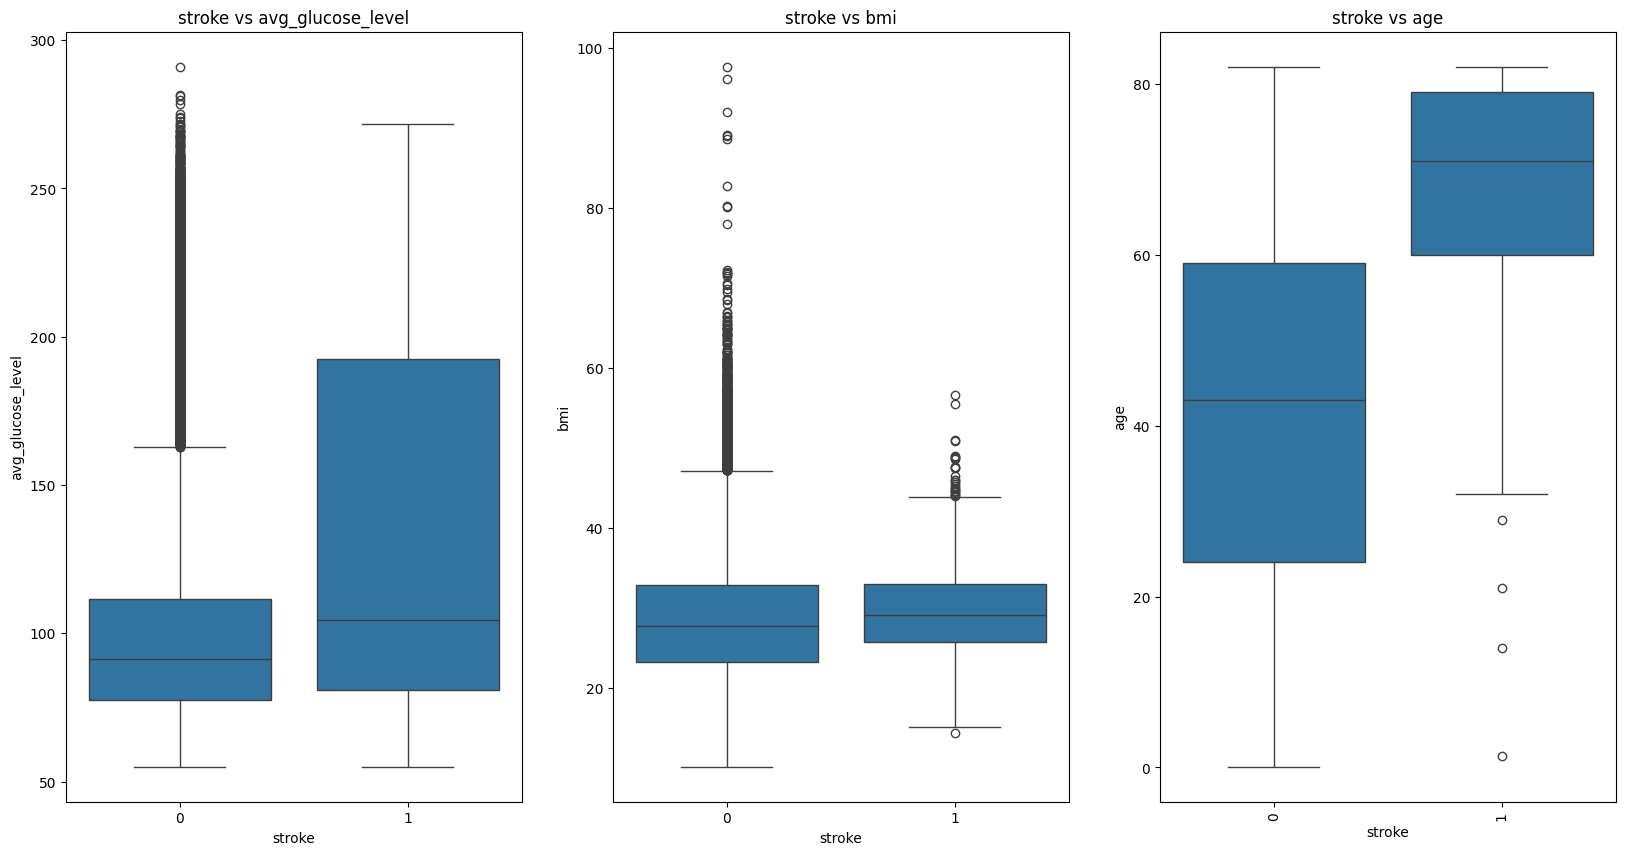

In [247]:
#Remove or impute outliers if necessary categorical.
numerical= ['avg_glucose_level', 'bmi', 'age']


plt.figure(figsize=(20,10))
for i, j in enumerate(numerical):
    plt.subplot(1,3, i+1)
    sns.boxplot(x =df['stroke'],y = df[j] )
    plt.title(f'stroke vs {j}')

plt.xticks(rotation=90)

plt.show()

In [248]:
# df['smoking_status'].fillna('Missing').groupby(df['stroke']).value_counts()

In [249]:
# Removing records where smoking status is null value
df.dropna(subset=['smoking_status'], inplace=True)

<Axes: xlabel='bmi', ylabel='Count'>

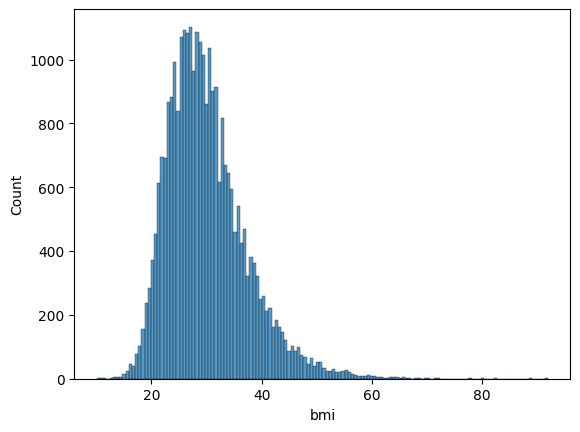

In [250]:
# Checking the 'bmi' distributions
sns.histplot(df['bmi'])

In [251]:
#df['bmi'].mode()

In [252]:
#df['bmi'].fillna(df['bmi'].mean(), inplace= True)

In [253]:
# 
missing = df['bmi'].isnull()
num_missing = missing.sum()
sampled_values = df['bmi'].dropna().sample(num_missing, random_state=0)
sampled_values.index = df[missing].index
df.loc[missing, 'bmi'] = sampled_values

<Axes: xlabel='bmi', ylabel='Count'>

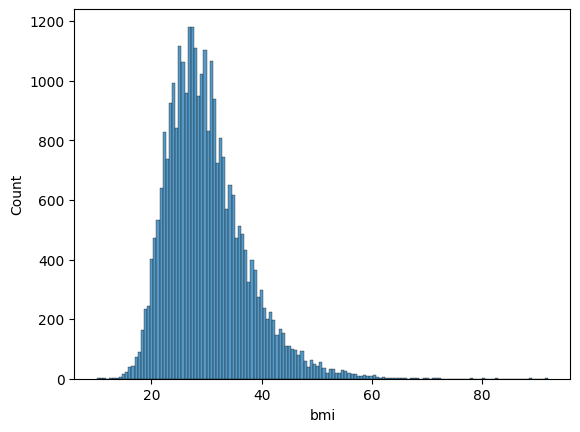

In [254]:
sns.histplot(df['bmi'])

In [255]:
# df['bmi'] = df.groupby('age')['bmi'].transform(lambda x: x.fillna(x.mean()))

In [256]:
# sns.histplot(df['bmi'])

In [257]:
#Duplication Removal
df.drop_duplicates()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [258]:
#typo errors removal
df['gender'].unique()


array(['Male', 'Female', 'Other'], dtype=object)

In [259]:
df['gender'].value_counts()

gender
Female    18366
Male      11733
Other         9
Name: count, dtype: int64

Only a few observation are labelled as others and I have no information on these patients so I will exclude them for the reamining of the analysis. 

In [260]:
df = df[df['gender'].isin(['Female', 'Male'])]

In [261]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [262]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [263]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [264]:
df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [265]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [266]:
#sns.displot(df)

In [267]:
df.groupby('smoking_status')['stroke'].value_counts().reset_index()

,smoking_status,stroke,count
0,formerly smoked,0,7266
1,formerly smoked,1,221
2,never smoked,0,15767
3,never smoked,1,284
4,smokes,0,6428
5,smokes,1,133


In [268]:
df.groupby('hypertension')['stroke'].value_counts().reset_index()

,hypertension,stroke,count
0,0,0,26110
1,0,1,461
2,1,0,3351
3,1,1,177


In [269]:
df.groupby('heart_disease')['stroke'].value_counts().reset_index()

,heart_disease,stroke,count
0,0,0,27925
1,0,1,496
2,1,0,1536
3,1,1,142


In [270]:
df.groupby('stroke')['avg_glucose_level'].mean().reset_index()

,stroke,avg_glucose_level
0,0,106.671483
1,1,131.306301


In [271]:
df2 = df.copy()

In [289]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,58.0,hypertension,no heart disease,Yes,Private,Urban,87.96,39.2,never smoked,0
3,Female,70.0,no hypertension,no heart disease,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,Female,52.0,no hypertension,no heart disease,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,Female,75.0,no hypertension,heart disease,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,Female,32.0,no hypertension,no heart disease,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,no hypertension,no heart disease,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,no hypertension,no heart disease,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,hypertension,no heart disease,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,no hypertension,no heart disease,Yes,Private,Urban,99.16,33.2,never smoked,0


In [272]:

# Update the 'hypertension' column
df['hypertension'] = df['hypertension'].apply(lambda x: 'no hypertension' if x == 0 else 'hypertension')

# Update the 'heart_disease' column
df['heart_disease'] = df['heart_disease'].apply(lambda x: 'no heart disease' if x == 0 else 'heart disease')

C:\Users\HOME\AppData\Local\Temp\ipykernel_9836\1606473262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hypertension'] = df['hypertension'].apply(lambda x: 'no hypertension' if x == 0 else 'hypertension')
C:\Users\HOME\AppData\Local\Temp\ipykernel_9836\1606473262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heart_disease'] = df['heart_disease'].apply(lambda x: 'no heart disease' if x == 0 else 'heart disease')


we can see that is umbalanced 

In [311]:
df.groupby('stroke').count().reset_index()

,stroke,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,29461,29461,29461,29461,29461,29461,29461,29461,29461,29461
1,1,638,638,638,638,638,638,638,638,638,638


In [309]:
df_stroke = df[df['stroke'] == 1]
df_no_stroke = df[df['stroke'] == 0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,Male,67.0,no hypertension,heart disease,Yes,Private,Urban,228.69,36.6,formerly smoked,1
81,Female,61.0,no hypertension,no heart disease,Yes,Self-employed,Rural,202.21,33.7,never smoked,1
141,Male,80.0,no hypertension,heart disease,Yes,Private,Rural,105.92,32.5,never smoked,1
257,Female,49.0,no hypertension,no heart disease,Yes,Private,Urban,171.23,34.4,smokes,1
264,Female,79.0,hypertension,no heart disease,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
43119,Male,76.0,no hypertension,no heart disease,Yes,Self-employed,Rural,93.38,26.7,formerly smoked,1
43148,Female,56.0,no hypertension,no heart disease,Yes,Private,Rural,83.27,32.9,smokes,1
43304,Female,80.0,no hypertension,no heart disease,Yes,Self-employed,Urban,75.91,26.7,never smoked,1
43318,Male,62.0,hypertension,heart disease,Yes,Private,Rural,77.97,31.5,formerly smoked,1


In [346]:

#Scale numerical features using standard scaling (StandardScaler in Python).

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_cols =['age','avg_glucose_level','bmi']
# Fit and transform the training data
df_scaled = scaler.fit_transform(df[numeric_cols])
df_scaled_df  = pd.DataFrame(df_scaled, columns=numeric_cols)

df_scaled_f = pd.concat([df.drop(['age','avg_glucose_level','bmi'], axis=1).reset_index(), df_scaled_df], axis=1)

df_scaled_f

,index,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age,avg_glucose_level,bmi
0,1,Male,hypertension,no heart disease,Yes,Private,Urban,never smoked,no stroke,0.536508,-0.418424,1.271145
1,3,Female,no hypertension,no heart disease,Yes,Private,Rural,formerly smoked,no stroke,1.176491,-0.830025,0.812381
2,6,Female,no hypertension,no heart disease,Yes,Private,Urban,formerly smoked,no stroke,0.216517,-0.644022,-1.717773
3,7,Female,no hypertension,heart disease,Yes,Self-employed,Rural,never smoked,no stroke,1.443150,2.965970,-0.424892
4,8,Female,no hypertension,no heart disease,Yes,Private,Rural,smokes,no stroke,-0.850121,-0.642281,0.311911
...,...,...,...,...,...,...,...,...,...,...,...,...
30094,43395,Female,no hypertension,no heart disease,No,children,Urban,never smoked,no stroke,-2.023422,-1.056275,-1.342420
30095,43396,Female,no hypertension,no heart disease,Yes,Govt_job,Urban,formerly smoked,no stroke,0.429844,2.315066,3.523260
30096,43397,Female,hypertension,no heart disease,Yes,Private,Urban,formerly smoked,no stroke,1.816473,-0.331840,-0.160755
30097,43398,Male,no hypertension,no heart disease,Yes,Private,Urban,never smoked,no stroke,-0.423466,-0.174771,0.437028


In [273]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [274]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1,Male,58.0,hypertension,no heart disease,Yes,Private,Urban,87.96,39.2,never smoked
3,Female,70.0,no hypertension,no heart disease,Yes,Private,Rural,69.04,35.9,formerly smoked
6,Female,52.0,no hypertension,no heart disease,Yes,Private,Urban,77.59,17.7,formerly smoked
7,Female,75.0,no hypertension,heart disease,Yes,Self-employed,Rural,243.53,27.0,never smoked
8,Female,32.0,no hypertension,no heart disease,Yes,Private,Rural,77.67,32.3,smokes
...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,no hypertension,no heart disease,No,children,Urban,58.64,20.4,never smoked
43396,Female,56.0,no hypertension,no heart disease,Yes,Govt_job,Urban,213.61,55.4,formerly smoked
43397,Female,82.0,hypertension,no heart disease,Yes,Private,Urban,91.94,28.9,formerly smoked
43398,Male,40.0,no hypertension,no heart disease,Yes,Private,Urban,99.16,33.2,never smoked


In [275]:
#Split the data into training and testing sets using a 80/20 or 70/30 split.
#Use a random state of 0 or 42 to ensure reproducibility.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [276]:
X_train.shape ,X_test.shape,y_train.shape,y_test.shape

((21069, 10), (9030, 10), (21069,), (9030,))

In [300]:
y_test.value_counts()

stroke
0    8856
1     174
Name: count, dtype: int64

In [277]:

from sklearn.preprocessing import OneHotEncoder


# Initialize the OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training data
oh.fit(X_train[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

# Transform the training data
X_train_encoded = oh.transform(X_train[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]).toarray()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=oh.get_feature_names_out(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']))

# Transform the test data
X_test_encoded = oh.transform(X_test[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]).toarray()
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=oh.get_feature_names_out(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']))

# Reset index to ensure proper alignment
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Drop the original categorical columns and concatenate the encoded columns
X_train_final = pd.concat([X_train.drop(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.drop(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1), X_test_encoded_df], axis=1)




In [278]:


#Scale numerical features using standard scaling (StandardScaler in Python).

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_cols =['age','avg_glucose_level','bmi']
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_cols)

# Transform the test data
X_test_scaled = scaler.transform(X_test[numeric_cols])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_cols)

X_train_f = pd.concat([X_train_final.drop(['age','avg_glucose_level','bmi'], axis=1), X_train_scaled_df], axis=1)
X_test_f = pd.concat([X_test_final.drop(['age','avg_glucose_level','bmi'], axis=1), X_test_scaled_df], axis=1)
X_train_f

,gender_Female,gender_Male,hypertension_hypertension,hypertension_no hypertension,heart_disease_heart disease,heart_disease_no heart disease,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,avg_glucose_level,bmi
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.650382,-0.242481,-0.978165
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.329510,-0.711646,-0.240864
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.114415,-0.025275,-0.686027
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.527330,-0.790492,-0.352155
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.259936,-0.039611,0.162564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21064,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.756159,-0.604129,0.343412
21065,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.863117,0.052267,-0.644293
21066,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.809638,-0.301127,-0.171308
21067,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.206457,0.230593,1.651077


In [312]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

# Inicializar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Perform under-sampling on the training data
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_f, y_train)


# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_f)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.2f}')
confusion_matrix(y_test, y_pred)

# Mostrar métricas adicionales (opcional)
print(classification_report(y_test, y_pred))

new = pd.DataFrame(y_pred, y_test)


Accuracy del modelo: 0.72
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      8856
           1       0.05      0.79      0.10       174

    accuracy                           0.72      9030
   macro avg       0.52      0.75      0.46      9030
weighted avg       0.98      0.72      0.82      9030



In [313]:
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[6345 2511]
 [  37  137]]
0.05173716012084592


Text(50.722222222222214, 0.5, 'Actual')

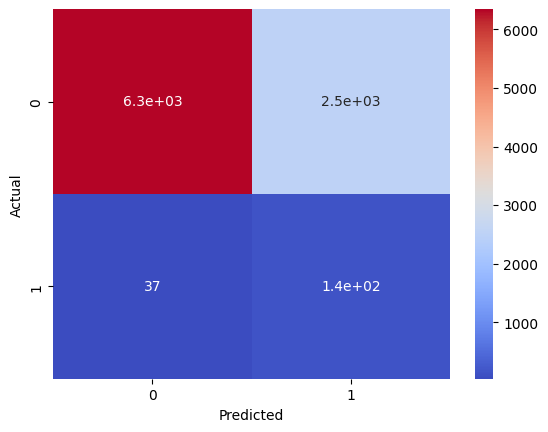

In [314]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm' )
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [315]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)

# Perform oversampling on the training data
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_f, y_train)

# Train the model with the oversampled data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = model.predict(X_test_f)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.2f}')

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a DataFrame to compare actual vs predicted
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df.head())


Accuracy del modelo: 0.72
Confusion Matrix:
[[6380 2476]
 [  35  139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.84      8856
           1       0.05      0.80      0.10       174

    accuracy                           0.72      9030
   macro avg       0.52      0.76      0.47      9030
weighted avg       0.98      0.72      0.82      9030

       Actual  Predicted
25786       0          0
5652        0          1
31124       0          1
4401        0          1
26759       0          0


Predicting avg Glucosa

In [318]:
df['stroke'] = df['stroke'].apply(lambda x: 'no stroke' if x == 0 else 'stroke')

C:\Users\HOME\AppData\Local\Temp\ipykernel_9836\3736421703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stroke'] = df['stroke'].apply(lambda x: 'no stroke' if x == 0 else 'stroke')


In [351]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
categorical =['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
ohe.fit(df[categorical])

df_array = ohe.transform(df[categorical]).toarray()

df_2 = pd.DataFrame(df_array, columns=ohe.get_feature_names_out(categorical))

df_2.reset_index(drop=True, inplace=True)


# Drop the original categorical columns and concatenate the encoded columns
dff = pd.concat([df.drop(['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',
                          'smoking_status','stroke'], axis=1).reset_index(drop=True), df_2], axis=1)

dff

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_hypertension,hypertension_no hypertension,heart_disease_heart disease,heart_disease_no heart disease,ever_married_No,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_no stroke,stroke_stroke
0,58.0,87.96,39.2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,70.0,69.04,35.9,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,52.0,77.59,17.7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,75.0,243.53,27.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,32.0,77.67,32.3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30094,10.0,58.64,20.4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
30095,56.0,213.61,55.4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
30096,82.0,91.94,28.9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
30097,40.0,99.16,33.2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [360]:
x = dff.drop('avg_glucose_level', axis=1)
Y = dff['avg_glucose_level']
Y

0         87.96
1         69.04
2         77.59
3        243.53
4         77.67
          ...  
30094     58.64
30095    213.61
30096     91.94
30097     99.16
30098     79.48
Name: avg_glucose_level, Length: 30099, dtype: float64

In [354]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)


In [358]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lr = LinearRegression()
lss = Lasso()
rd = Ridge()
en = ElasticNet()

lr.fit(x_train, Y_train)
lss.fit(x_train, Y_train)
rd.fit(x_train, Y_train)
en.fit(x_train, Y_train)


y_predict_lr =lr.predict(x_test)
y_predict_lss =lss.predict(x_test)
y_predict_rd =rd.predict(x_test)
y_predict_en =en.predict(x_test)


print('lr r2_score',r2_score(Y_test, y_predict_lr) )
print('lr mean_squared_error',mean_squared_error(Y_test, y_predict_lr))
print('lr mean_absolute_error',mean_absolute_error(Y_test, y_predict_lr))
print('lr root_mean_absolute_error', np.sqrt(mean_squared_error(y_test,y_predict_lr)))
print('---------'*10)


print(' lss r2_score',r2_score(Y_test, y_predict_lss) )
print('lss mean_squared_error',mean_squared_error(Y_test, y_predict_lss))
print('lss mean_absolute_error',mean_absolute_error(Y_test, y_predict_lss))
print('lss root_mean_absolute_error', np.sqrt(mean_squared_error(y_test,y_predict_lss)))
print('---------'*10)

print('rd r2_score',r2_score(Y_test, y_predict_rd) )
print('rd mean_squared_error',mean_squared_error(Y_test, y_predict_rd))
print('rd mean_absolute_error',mean_absolute_error(Y_test, y_predict_rd))
print('rd root_mean_absolute_error', np.sqrt(mean_squared_error(y_test,y_predict_rd)))
print('---------'*10)

print('en r2_score',r2_score(Y_test, y_predict_en) )
print('en mean_squared_error',mean_squared_error(Y_test, y_predict_en))
print('en mean_absolute_error',mean_absolute_error(Y_test, y_predict_en))
print('en root_mean_absolute_error', np.sqrt(mean_squared_error(y_test,y_predict_en)))
print('---------'*10)





lr r2_score 0.0867437091880896
lr mean_squared_error 1915.4194841817348
lr mean_absolute_error 32.911309632651225
lr root_mean_absolute_error 43.765505642934535
------------------------------------------------------------------------------------------
 lss r2_score 0.07724251457051323
lss mean_squared_error 1935.3468293055546
lss mean_absolute_error 33.136685269595276
lss root_mean_absolute_error 43.992576979594574
------------------------------------------------------------------------------------------
rd r2_score 0.08674580722941738
rd mean_squared_error 1915.4150838515336
rd mean_absolute_error 32.911325562213364
rd root_mean_absolute_error 43.76545537123467
------------------------------------------------------------------------------------------
en r2_score 0.07818857224854514
en mean_squared_error 1933.3626137815081
en mean_absolute_error 33.12693785807859
en root_mean_absolute_error 43.97001948807287
------------------------------------------------------------------------------